In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# reading the data set
df = pd.read_csv('D://M_AI//Machine Learning//Projects//breast-cancer-data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [52]:
# checking the missing values
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [53]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [54]:
# adding new target column
df['target'] = df.diagnosis.map({'B':1,'M':0})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [55]:
# dropping the diagnosis column
df.drop(['diagnosis'],axis=1,inplace=True)

In [56]:
# Scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

scaled_data = scaler.transform(df)

In [57]:
# PCA for 2 components
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(scaled_data)

x_pca = pca.transform(scaled_data)

In [58]:
print(scaled_data.shape)
print(x_pca.shape)

(569, 32)
(569, 2)


Text(0, 0.5, 'Second Principal Component')

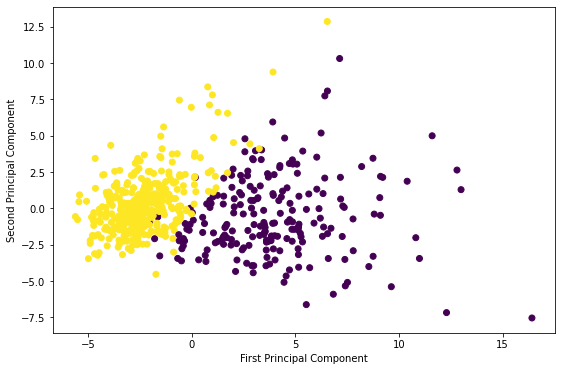

In [59]:
# plotting the two components
plt.figure(figsize=(9,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df.target)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [60]:
pca.components_

array([[ 0.02201329,  0.21640403,  0.10370573,  0.22454145,  0.21800668,
         0.13749109,  0.23131053,  0.25111541,  0.25516127,  0.13284549,
         0.0577855 ,  0.20102986,  0.01546228,  0.20574033,  0.19816935,
         0.01137556,  0.1618341 ,  0.14574961,  0.17626337,  0.03825491,
         0.09502715,  0.22559681,  0.10505804,  0.23363556,  0.2220217 ,
         0.12518792,  0.20428815,  0.2229275 ,  0.24616145,  0.12046143,
         0.12652423, -0.21683559],
       [-0.03236754, -0.22604516, -0.05858664, -0.20712474, -0.22289674,
         0.18904243,  0.15896699,  0.06817531, -0.02670216,  0.19352523,
         0.36758089, -0.09757655,  0.09077639, -0.08108218, -0.14407057,
         0.20414373,  0.23863145,  0.20284909,  0.13667082,  0.18572002,
         0.28383027, -0.21240772, -0.04516373, -0.19209362, -0.21159512,
         0.17272925,  0.14826692,  0.10359117, -0.00178544,  0.14276478,
         0.2767951 ,  0.07703497]])

In [61]:
# variance
pca.explained_variance_ratio_

array([0.43512603, 0.17910333])

In [62]:
# PCA for 3 components
pca2 = PCA(n_components = 3)
pca2.fit(scaled_data)

X_pca = pca2.transform(scaled_data)

In [63]:
print(scaled_data.shape)
print(X_pca.shape)

(569, 32)
(569, 3)


In [64]:
# finding the accuracy scores
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test = train_test_split(df,df.target,test_size=0.3,random_state=100)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
                        

In [65]:
# Accuracy scores for 2 components
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)
                        

In [66]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

lr.score(x_test,y_test)

0.9766081871345029

In [67]:
# Accuracy score for 3 components

X_train,X_test,Y_train,Y_test = train_test_split(df,df.target,test_size=0.3,random_state=100)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
                        
X_train = pca2.transform(X_train)
X_test = pca2.transform(X_test)
                        
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train,Y_train)

Y_pred = lr.predict(X_test)

lr.score(X_test,Y_test)
                        

0.9824561403508771